In [1]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
def mod_pert_random(low, likely, high, confidence=4, samples=10000):
    """Produce random numbers according to the 'Modified PERT' 
    distribution. 
    
    :param low: The lowest value expected as possible.
    :param likely: The 'most likely' value, statistically, the mode.
    :param high: The highest value expected as possible.
    :param confidence: This is typically called 'lambda' in literature 
                        about the Modified PERT distribution. The value
                        4 here matches the standard PERT curve. Higher
                        values indicate higher confidence in the mode.
                        Currently allows values 1-18
                        
    Formulas from "Modified Pert Simulation" by Paulo Buchsbaum.
    """
    # Check minimum & maximum confidence levels to allow:
    if confidence < 1 or confidence > 18:
        raise ValueError('confidence value must be in range 1-18.')
        
    mean = (low + confidence * likely + high)/(confidence + 2)

    a = (mean - low)/(high - low) * (confidence + 2)
    b = ((confidence + 1) * high - low - confidence * likely) / (high - low)
    
    beta = np.random.beta(a, b, samples)
    beta = beta * (high - low) + low
    return beta

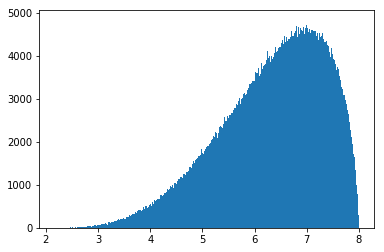

In [8]:
p = plt.hist(mod_pert_random(2, 7, 8, samples=1000000), 
             bins=500,
             density=False)
plt.show()

In [12]:
# source:https://www.isws.illinois.edu/statecli/urbana/urbana-monthly-2017.htm
# Precipitation and snowfall are measured at 8 am and represent the previous 24 hours, T means a trace of precipitation	
weather=pd.read_csv('champaign weather.csv')

In [13]:
weather.head()

,Day,High,Time (CST),Low,Time (CST).1,Mean,Depart,Heating,Cooling,Precipitation,Snowfall,Snow Depth,4 inch,8 inch,Morning Low,Comments
0,1,43,1:20 PM,19,5:02 AM,31,5,34,0,0,0,0,35.0,38.0,19.0,NaN
1,2,47,2:58 PM,33,12:00 AM,40,15,25,0,T,0,0,37.0,38.0,33.0,"fog, rain"
2,3,45,1:08 AM,21,11:58 PM,33,8,32,0,0.14,0,0,41.0,41.0,42.0,"fog, rain"
3,4,22,1:37 PM,13,7:34 AM,18,-7,47,0,0.11,0,0,37.0,39.0,13.0,"fog, rain"
4,5,15,12:00 AM,7,11:59 PM,11,-14,54,0,0.04,0.6,1,35.0,37.0,9.0,snow


In [14]:
# mean<=14 cold
# mean>=95 hot
# precipitation=T light rain
# 0<precipitaion<0.25 moderate rain
# precipitation >=0.25 heavy rain
# snowfall=T light snow
# snowfall<1 moderate snow
# snowfall>=1 heavy snow
# other sunny or cloudy(no influence)

In [16]:
weather_extract=weather[['Mean','Precipitation','Snowfall']]

In [30]:
weather_extract.head()

,Mean,Precipitation,Snowfall
0,31,0,0
1,40,T,0
2,33,0.14,0
3,18,0.11,0
4,11,0.04,0.6


In [25]:
weather_extract.dtypes

Mean              int64
Precipitation    object
Snowfall         object
dtype: object

In [31]:
def rain(x):
    if x == 'T':
        return 'light rain'
    else:
        x= float(x)
        if x<0.25 and x>0:
            return 'moderate rain'
        elif x>=0.25:
            return 'heavy rain'
        else:
            return 'no influence'

In [35]:
def snow(x):
    if x == 'T':
        return 'light snow'
    else:
        x=float(x)
        if x<1 and x>0:
            return 'moderate snow'
        elif x>=1:
            return 'heavy snow'
        else:
            return 'no influence'

In [36]:
def temperature(x):
    if x<=14:
        return 'too cold'
    elif x>=95:
        return 'too hot'
    else:
        return 'no influence'

In [37]:
weather_extract['rain']=weather_extract.Precipitation.apply(lambda x:rain(x))
weather_extract['snow']=weather_extract.Snowfall.apply(lambda x:snow(x))
weather_extract['temperature']=weather_extract.Mean.apply(lambda x:temperature(x))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [39]:
weather_extract.head()

,Mean,Precipitation,Snowfall,rain,snow,temperature
0,31,0,0,no influence,no influence,no influence
1,40,T,0,light rain,no influence,no influence
2,33,0.14,0,moderate rain,no influence,no influence
3,18,0.11,0,moderate rain,no influence,no influence
4,11,0.04,0.6,moderate rain,moderate snow,too cold


In [44]:
weather_extract.shape[0]

365

In [45]:
rain=(weather_extract.groupby('rain').size()/weather_extract.shape[0]).reset_index()

In [46]:
rain

,rain,0
0,heavy rain,0.109589
1,light rain,0.112329
2,moderate rain,0.208219
3,no influence,0.569863


In [47]:
snow=(weather_extract.groupby('snow').size()/weather_extract.shape[0]).reset_index()

In [48]:
snow

,snow,0
0,heavy snow,0.010959
1,light snow,0.041096
2,moderate snow,0.019178
3,no influence,0.928767


In [49]:
temperature=(weather_extract.groupby('temperature').size()/weather_extract.shape[0]).reset_index()

In [50]:
temperature

,temperature,0
0,no influence,0.972603
1,too cold,0.027397
